In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

cacao = pd.read_csv('/Users/jbalanova/downloads/stud_math.csv')

#переменные, которые содержит датасет:

#1 school — аббревиатура школы, в которой учится ученик
#2 sex — пол ученика ('F' - женский, 'M' - мужской)
#3 age — возраст ученика (от 15 до 22)
#4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
#5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
#6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
#7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
#12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
#13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин
#14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
#15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
#16 schoolsup — дополнительная образовательная поддержка (yes или no)
#17 famsup — семейная образовательная поддержка (yes или no)
#18 paid — дополнительные платные занятия по математике (yes или no)
#19 activities — дополнительные внеучебные занятия (yes или no)
#20 nursery — посещал детский сад (yes или no)
#21 higher — хочет получить высшее образование (yes или no)
#22 internet — наличие интернета дома (yes или no)
#23 romantic — в романтических отношениях (yes или no)
#24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
#25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
#26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
#27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
#28 absences — количество пропущенных занятий
#29 score — баллы по госэкзамену по математике

In [4]:
conda install -c conda-forge jupyter_contrib_nbextensions

Solving environment: done

## Package Plan ##

  environment location: /Users/jbalanova/opt/anaconda3

  added / updated specs:
    - jupyter_contrib_nbextensions


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    jupyter_contrib_core-0.3.3 |             py_2          15 KB  conda-forge
    jupyter_contrib_nbextensions-0.5.1|     pyhd8ed1ab_2        19.5 MB  conda-forge
    jupyter_highlight_selected_word-0.2.0|py38h50d1736_1002          14 KB  conda-forge
    jupyter_latex_envs-1.4.6   |  pyhd8ed1ab_1002         735 KB  conda-forge
    jupyter_nbextensions_configurator-0.4.1|   py38h50d1736_2         471 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:  

done

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install autopep8

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind


#загрузка первоначального файла с данными 
stud = pd.read_csv('/Users/jbalanova/downloads/stud_math.csv')

In [4]:
#Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [11]:
#отразились не все столбцы, отразим их все, из описания нам известно, что столбцов 30, отразим 30 столбцов 
pd.set_option('display.max_columns', 30)
display(stud.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [83]:
#сравним, совпадают ли столбцы с описанием 
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   p_status    395 non-null    object 
 6   m_edu       392 non-null    float64
 7   f_edu       371 non-null    float64
 8   m_job       376 non-null    object 
 9   f_job       359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

###### вывод: В описание 29 переменных, а столбцов 30. столбец 'studytime, granular' - отсутствует в описании

In [39]:
# Попробуем разобраться, нужен ли нам данный столбец.
# По названию 'studytime, granular' очень похож на название 'studytime', возможно они схожи по соденржанию, проверим это 
stud.loc[:,['studytime','studytime, granular']]

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [44]:
# попробуем вывести распределение значений этих столбцов
# но с начала переименуем столбец 'studytime, granular'
stud.rename(columns={'studytime, granular': 'studytime_granular'}, inplace=True)
display(pd.DataFrame(stud.studytime.value_counts()),pd.DataFrame(stud.studytime_granular.value_counts()))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


In [46]:
# выглядит, что studytime_granular это те же данные, что и studytime только умноженные на 3
# на всякий случай посмотрим корреляцию столбцов 
stud['studytime'].corr(stud['studytime_granular'])

-0.9999999999999991

In [48]:
# для дальнейшего анализа данные столбца studytime_granular использовать не будем, т.к для анализа нам достаточно studytime
# удалим столбец
stud.drop(['studytime_granular'], inplace = True, axis = 1)

In [49]:
# Общий анализ таблицы.
# посмотрим как записаны столбцы
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [50]:
# Переименуем некоторые столбцы, для удобства 
stud.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job'}, inplace=True)

In [51]:
# Еще раз выведем названия 

# проверим что все ок
display(stud.head(10))

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [52]:
# наша задача проанализировать => отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике
# по этому в первую очередь посмотрим на столбец score
stud.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [53]:
Output_score = "В данных score нет пропусков"

In [54]:
# проанализируем данные из столбца - школы
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


In [55]:
stud.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [24]:
Output_school = "есть 2 значения школ: GP, MS; в данных нет пропусков"

In [56]:
#далее просто посмотрим на качество заполнения информации про возраст и пол учеников 
stud.loc[:, ['sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [57]:
stud.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [58]:
Output_sex_age = "для показалей Sex, Age - информация заполнена во всех строках"

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

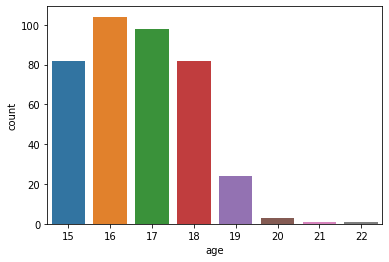

In [60]:
# Посмотрим на распределение возраста учеников.
display(stud.age.describe())
display(stud.age.value_counts())
sns.countplot(x='age', data=stud)

In [61]:
Output_age = "Основная масса учеников находится в возрасте 15-18 лет"

In [63]:
#Посмотрим какая часть учащихся живет в городе, а какая за городом = > address
#Проверим имеются ли у нас пропущенные значения:
stud.address = stud.address.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.address.value_counts()))

,address
U,295
R,83
nan,17


In [84]:
#как видно, 17 значений у нас не заполнено. Но у нас есть значение:
#13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин
#можно предположить, что если время в пути более 15 мин (2, 3 и 4 значение), то школьник живет вне города 
#Если значение времени на дорогу не указано, заменяем пустое значение на наиболее распространенное/ мода.
import math
def address_full(row, most_frequent_value):
    if str(row.address) == 'nan':
        if math.isnan(row.traveltime):
            return most_frequent_value
        else:
            if int(row.traveltime) > 1:
                return 'R'
            else:
                return 'U'
    else:
        return row.address
 
stud.address = stud.apply(address_full, axis=1, args=(stud.address.value_counts().idxmax()))
display(pd.DataFrame(stud.address.value_counts()))

,address
U,306
R,89


In [ ]:
Output_address = "Основная масса учеников проживает в городе"

In [71]:
#проверим качество данных => Traevel time
stud.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<AxesSubplot:xlabel='traveltime', ylabel='count'>

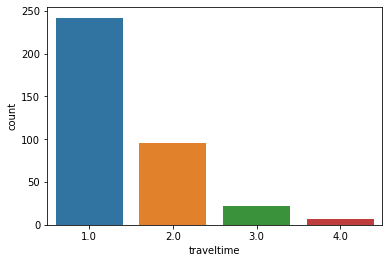

In [74]:
#как видно из информации, не все данные заполнены
# применим тот же принцып, что и ранее, если время в пути более 30 мин (3 и 4 значение), то школьник живет вне города 
def traveltime_full(row):
    if (row.traveltime) == 0.0:        
        if row.address == 'U':
            return 1.0
        else:
            return 2.0
    else:
        return row.traveltime
    
stud.traveltime = stud.apply(traveltime_full, axis=1)
display(pd.DataFrame(stud.traveltime.value_counts()))
sns.countplot(x='traveltime', data=stud)

In [ ]:
Output_traveltime = "Основная масса учеников тратит на то, что бы добраться до школы не более 15 минут"

In [77]:
# проанализируем значение семьи =>famsize
stud.famsize = stud.famsize.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.famsize.value_counts()))

,famsize
GT3,261
LE3,107
nan,27


In [80]:
#У нас имеются незаполненные значения. 
#Для определения значения размера семьи попробуем посмотреть, живут ли дети с родителями:
#6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
stud.p_status = stud.p_status.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.p_status.value_counts()))

,p_status
T,314
nan,45
A,36


In [81]:
#Примем, что если родители проживают совместно, то размер семьи > 3-х человек, если раздельно - то <= 3. 
#Если значение статуса жилья родителей не задано, то примемен значение моды.
def famsize_full(row):
    if row.famsize == 'nan':
        if row.p_status == 'nan':
            return 'GT3'
        else:
            if row.p_status == 'T':
                return 'GT3'
            else:
                return 'LE3'
    else:
        return row.famsize


stud.famsize = stud.apply(famsize_full, axis=1)
display(pd.DataFrame(stud.famsize.value_counts()))

,famsize
GT3,285
LE3,110


In [82]:
# Также приведем в порядок данные по совместному проживанию родителей
# используем тот же метод определения совместного проживания, что и ранее 
def p_status_full(row):
    if row.p_status == 'nan':
        if row.famsize == 'nan':
            return 'T'
        else:
            if row.famsize == 'GT3':
                return 'T'
            else:
                return 'A'
    else:
        return row.p_status


stud.p_status = stud.apply(p_status_full, axis=1)
display(pd.DataFrame(stud.p_status.value_counts()))

,p_status
T,346
A,49


In [ ]:
Output_p_status = "Основная масса учеников живут в семьях, где родители проживают совместно"

,m_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<AxesSubplot:xlabel='m_edu', ylabel='count'>

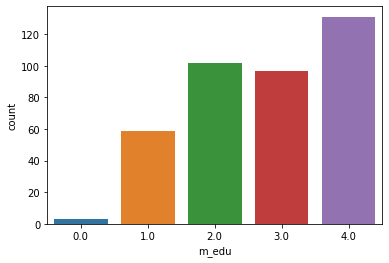

In [92]:
# проанализируем m_edu — образование матери
display(pd.DataFrame(stud.m_edu.value_counts()))
sns.countplot(x='m_edu', data=stud)

In [88]:
stud.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [89]:
Output_m_edu = "3 строки без данных. Заполнить значения нет возможности, т.к. нет одного наиболее популярного. Превалирует количество матерей с высшим образованием" 

In [90]:
# проанализируем f_edu — образование отца
pd.DataFrame(stud.f_edu.value_counts())

,f_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [93]:
# как видно, есть значение "40", такого нет в описание. Примем, что это ошибка и имелось в виду "4"
stud.loc[stud['f_edu'] == 40.0, 'f_edu'] = 4.0

In [94]:
pd.DataFrame(stud.f_edu.value_counts())

,f_edu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


In [95]:
stud.loc[:, ['f_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [96]:
x = 395 - 371
display(x)

24

In [97]:
# отсутствует 24 значения. на данном этапе отсутствует возможность однозначно определить уровень образования отца

,f_edu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


<AxesSubplot:xlabel='f_edu', ylabel='count'>

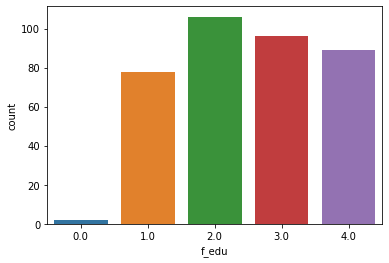

In [98]:
display(pd.DataFrame(stud.f_edu.value_counts()))
sns.countplot(x='f_edu', data=stud)

In [99]:
Output_f_edu = "Среди отцов преобладает 5-9 классов и среднее специальное или 11 классов. Это кажется несколько странным, беря во вним ание уровень образования у матерей, скорее всего отсутствующие 24 значения значительно искажают картину. Данный показатель исключаем из дальнейшего анализа"

In [100]:
stud.drop(['f_edu'], inplace = True, axis = 1)

In [101]:
# проанализируем m_job
pd.DataFrame(stud.m_job.value_counts())

,m_job
other,133
services,98
at_home,58
teacher,55
health,32


In [102]:
stud.loc[:, ['m_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [103]:
395-376

19

In [104]:
# как видно 19 значений не заполнено. Попробуем посмотреть, есть ли взаимосвязь образования матери и ее местом работы
stud.loc[:,['m_job','m_edu']]

,m_job,m_edu
0,at_home,4.0
1,at_home,1.0
2,at_home,1.0
3,health,4.0
4,other,3.0
...,...,...
390,services,2.0
391,services,3.0
392,other,1.0
393,services,3.0


In [ ]:
#Mjob — работа матери ('teacher' - 0, 'health' - 1, 'services' - 2, 'at_home' - 3, 'other' - 4)

In [122]:
# что бы было проще анализировать корреляцию, переведем значения 'm_job' в числа 
stud['m_job'] = stud['m_job'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3,'other':4 }) 

In [123]:
stud.loc[:,['m_job','m_edu']]

,m_job,m_edu
0,3.0,4.0
1,3.0,1.0
2,3.0,1.0
3,1.0,4.0
4,4.0,3.0
...,...,...
390,2.0,2.0
391,2.0,3.0
392,4.0,1.0
393,2.0,3.0


In [124]:
# посмотрим корреляцию столбцов 
stud['m_job'].corr(stud['m_edu'])

-0.32768037776409387

In [125]:
# корреляция слабая, как сделствие, мы не можем принять, что есть прямая зависимость между образованием и местом работы 
Output_m_job = "19 строк c неизвестными данными. Заполнить пропущенные данные нет возможности"

In [126]:
#f_job — работа отца
pd.DataFrame(stud.f_job.value_counts())

,f_job
other,197
services,102
teacher,29
at_home,16
health,15


In [127]:
stud.loc[:, ['f_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [128]:
395-359

36

<AxesSubplot:xlabel='f_job', ylabel='count'>

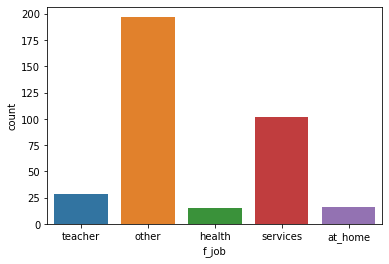

In [130]:
sns.countplot(x='f_job', data=stud)

In [131]:
Output_f_job = "36 значений строк отсутствует. Скорее всего данный показатель не будет включен в модель" 

In [133]:
#reason - Причина выбора школы. Проверим на наличие пустых значений.
stud.reason = stud.reason.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.reason.value_counts()))

,reason
course,137
home,104
reputation,103
other,34
nan,17


In [134]:
#как мы видим существует 17 пропущенных значений, проверим, есть ли корреляция traveltime 
stud.loc[:,['reason','traveltime']]

,reason,traveltime
0,course,2.0
1,course,1.0
2,other,1.0
3,home,1.0
4,home,1.0
...,...,...
390,course,1.0
391,course,2.0
392,course,1.0
393,course,3.0


In [135]:
# что бы было проще анализировать корреляцию, переведем значения 'reason' в числа 
# 'home':0, 'reputation':1, 'course':2, 'other':3)
stud['reason'] = stud['reason'].map({'home':0, 'reputation':1, 'course':2, 'other':3 }) 

In [136]:
stud.loc[:,['reason','traveltime']]

,reason,traveltime
0,2.0,2.0
1,2.0,1.0
2,3.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
390,2.0,1.0
391,2.0,2.0
392,2.0,1.0
393,2.0,3.0


In [137]:
# посмотрим корреляцию столбцов 
stud['reason'].corr(stud['traveltime'])

0.08354205979887795

<AxesSubplot:xlabel='reason', ylabel='count'>

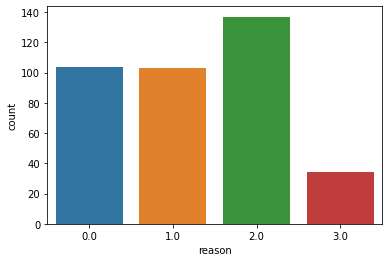

In [138]:
# корреляция слабая, нет возможности однозначно определить значения пропущеных столбцов
sns.countplot(x='reason', data=stud)

In [139]:
Output_reason = "17 значений строк отсутствует. Наиболее растпространенные причины: - близость к дому, репутация школы, образовательная программа" 

In [140]:
#Guardian - Опекун. Посмотрим на значения. Если присутствуют пустые, проанализируем, можем ли мы их заменить.
stud.guardian = stud.guardian.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.guardian.value_counts()))

,guardian
mother,250
father,86
nan,31
other,28


<AxesSubplot:xlabel='guardian', ylabel='count'>

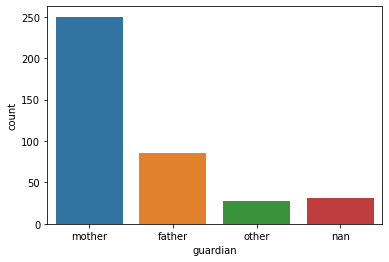

In [141]:
sns.countplot(x='guardian', data=stud)

In [149]:
Output_guardian = "В отчете отсутствует 31 значение, нет возможности его заполнить. Привалирующее значение - опекун мама"

In [150]:
#Studytime - Время на учёбу помимо школы

In [151]:
stud.studytime = stud.studytime.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(stud.studytime.value_counts()))

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


,studytime
2.0,201
1.0,103
3.0,64
4.0,27


<AxesSubplot:xlabel='studytime', ylabel='count'>

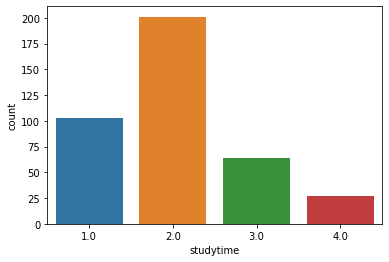

In [152]:
#присутствуют пустые значения. Заменим их на медианное значение.
median = stud.studytime.median()
stud.studytime = stud.studytime.apply(lambda x: median if x==0.0 else x)
display(pd.DataFrame(stud.studytime.value_counts()))
sns.countplot(x='studytime', data=stud)

In [153]:
Output_studytime = "Наибольшее значение 2-5 часов время на учёбу помимо школы в неделю"

,failures
0.0,315
1.0,49
2.0,16
3.0,15


<AxesSubplot:xlabel='failures', ylabel='count'>

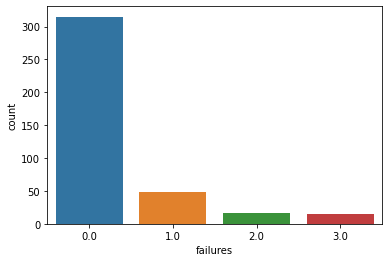

In [154]:
#failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4). Проверим данные 
stud.failures = stud.failures.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(stud.failures.value_counts()))
sns.countplot(x='failures', data=stud)

In [155]:
# уникальные значения соответствуют по кол-ву (четыре), но не соответсвуют значениям в описании 
# (n, если 1<=n<3, иначе 4) - в описании значения должны быть от 1 до 4
# и можно было бы привести их в соответствие с описанием

stud.loc[stud['failures'] == 3.0, 'failures'] = 4.0
stud.loc[stud['failures'] == 2.0, 'failures'] = 3.0
stud.loc[stud['failures'] == 1.0, 'failures'] = 2.0
stud.loc[stud['failures'] == 0.0, 'failures'] = 1.0

In [156]:
# и продолжаем
stud.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,failures
1.0,315
2.0,49
3.0,16
4.0,15


<AxesSubplot:xlabel='failures', ylabel='count'>

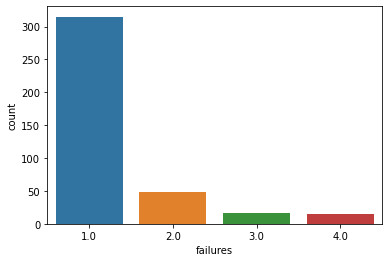

In [157]:
stud.failures = stud.failures.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(stud.failures.value_counts()))
sns.countplot(x='failures', data=stud)

In [158]:
Output_failures = "Наибольшее значение 1."

In [160]:
#schoolsup — дополнительная образовательная поддержка (yes или no)
stud.schoolsup = stud.schoolsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.schoolsup.value_counts()))

,schoolsup
no,335
yes,51
nan,9


In [161]:
Output_schoolsup = "Как видно у 9 строк отсутствует значение, а наибольшее знечение - отсутствие доп поддержки"

In [164]:
#famsup — семейная образовательная поддержка (yes или no)
stud.famsup = stud.famsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.famsup.value_counts()))

,famsup
yes,219
no,137
nan,39


In [166]:
#как видно, отсутствует 39 значений, можно заменить отсутствующие значения наиболее часто встречаемым 
y = stud.famsup.value_counts().idxmax()
stud.famsup = stud.famsup.apply(lambda x: y if x=='nan' else x)
display(pd.DataFrame(stud.famsup.value_counts()))

,famsup
yes,258
no,137


In [167]:
Output_famsup = "Большинство учеников получает дополнительную поддержку в семье"

In [169]:
#paid — дополнительные платные занятия по математике (yes или no) 
stud.paid = stud.paid.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.paid.value_counts()))

,paid
no,200
yes,155
nan,40


In [170]:
#как видно, отсутствует 40 значений, можно заменить отсутствующие значения наиболее часто встречаемым 
y = stud.paid.value_counts().idxmax()
stud.paid = stud.paid.apply(lambda x: y if x=='nan' else x)
display(pd.DataFrame(stud.paid.value_counts()))

,paid
no,240
yes,155


In [171]:
Output_paid = "Большинство учеников не получает дополнительные платные занятия по математике"

In [172]:
#activities — дополнительные внеучебные занятия (yes или no) 
stud.activities = stud.activities.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.activities.value_counts()))

,activities
yes,195
no,186
nan,14


In [173]:
Output_activities = "Отсутствует 14 записей, в виду того, что нет ярко выроженного показателя, нет возможности заполнить пустые значения"

In [174]:
#nursery — посещал детский сад (yes или no)
stud.nursery = stud.nursery.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.nursery.value_counts()))

,nursery
yes,300
no,79
nan,16


In [175]:
#как видно, отсутствует 16 значений, можно заменить отсутствующие значения наиболее часто встречаемым 
y = stud.nursery.value_counts().idxmax()
stud.nursery = stud.nursery.apply(lambda x: y if x=='nan' else x)
display(pd.DataFrame(stud.nursery.value_counts()))

,nursery
yes,316
no,79


In [176]:
Output_nursery = "Большинство учеников посещало детский сад"

In [177]:
#higher — хочет получить высшее образование (yes или no)

In [179]:
stud.higher = stud.higher.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.higher.value_counts()))

,higher
yes,356
nan,20
no,19


In [180]:
#как видно, отсутствует 19 значений, можно заменить отсутствующие значения наиболее часто встречаемым 
y = stud.higher.value_counts().idxmax()
stud.higher = stud.higher.apply(lambda x: y if x=='nan' else x)
display(pd.DataFrame(stud.higher.value_counts()))

,higher
yes,376
no,19


In [181]:
Output_higher = "Большинство учеников хочет получить высшее образование"

In [182]:
#internet — наличие интернета дома (yes или no)
stud.internet = stud.internet.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.internet.value_counts()))

,internet
yes,305
no,56
nan,34


In [183]:
#как видно, отсутствует 34 значений, можно заменить отсутствующие значения наиболее часто встречаемым 
y = stud.internet.value_counts().idxmax()
stud.internet = stud.internet.apply(lambda x: y if x=='nan' else x)
display(pd.DataFrame(stud.internet.value_counts()))

,internet
yes,339
no,56


In [184]:
Output_internet = "У большинства учеников есть интернет дома"

In [185]:
#romantic — в романтических отношениях (yes или no) 
stud.romantic = stud.romantic.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.romantic.value_counts()))

,romantic
no,240
yes,124
nan,31


In [186]:
#как видно, отсутствует 34 значений, можно заменить отсутствующие значения наиболее часто встречаемым 
y = stud.romantic.value_counts().idxmax()
stud.romantic = stud.romantic.apply(lambda x: y if x=='nan' else x)
display(pd.DataFrame(stud.romantic.value_counts()))

,romantic
no,271
yes,124


In [187]:
Output_romantic = "Большая часть учеников не состоит в романтических отношениях"

In [189]:
#famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо) 
stud.famrel = stud.famrel.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(stud.famrel.value_counts()))

,famrel
4.0,182
5.0,99
3.0,62
0.0,27
2.0,17
1.0,7
-1.0,1


In [190]:
# видим что появилось -1 значение которое не описано, скорее всего это я, заменим значение
stud.loc[stud['famrel'] == -1.0, 'famrel'] = 1.0

In [191]:
Output_famrel = "Отсутствует 27 записей, в виду того, что нет ярко выроженного показателя, нет возможности заполнить пустые значения"

In [192]:
#freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого) 
stud.freetime = stud.freetime.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(stud.freetime.value_counts()))

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
0.0,11


In [193]:
Output_freetime = "Отсутствует 11 записей, в виду того, что нет ярко выроженного показателя, нет возможности заполнить пустые значения"

In [194]:
#goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много) 
stud.goout = stud.goout.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(stud.goout.value_counts()))

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
0.0,8


In [195]:
Output_goout = "Отсутствует 8 записей, в виду того, что нет ярко выроженного показателя, нет возможности заполнить пустые значения"

In [196]:
#health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
stud.health = stud.health.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(stud.health.value_counts()))

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
0.0,15


In [197]:
Output_health = "Отсутствует 15 записей, в виду того, что нет ярко выроженного показателя, нет возможности заполнить пустые значения"

In [198]:
#absences — количество пропущенных занятий
display(stud.absences.describe())

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [199]:
#В столбце имеются пустые значения. Заменим их
median = stud.absences.median()
stud.absences = stud.absences.apply(lambda x: median if math.isnan(x) else x)

<AxesSubplot:>

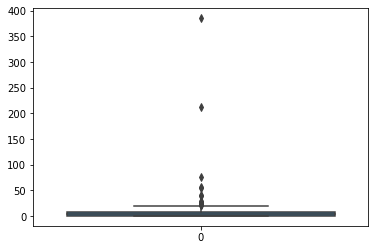

In [200]:
#посмотрим, счть ли выбросы
sns.boxplot(data=stud.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


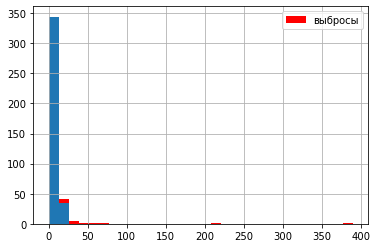

In [205]:
#на первый взгляд в выборке существуют значительные выбросы, проанализируем границы
# сделаем подровный анализ границ и расчитаем их точные значения
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.absences.loc[stud.absences <= 385].hist(bins = 30, 
                                  range = (0, 390), 
                                  color = 'red',
                                  label = 'выбросы')

stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(
bins = 30, range = (0, 390))

plt.legend();

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


count    393.000000
mean       5.697201
std        7.969484
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

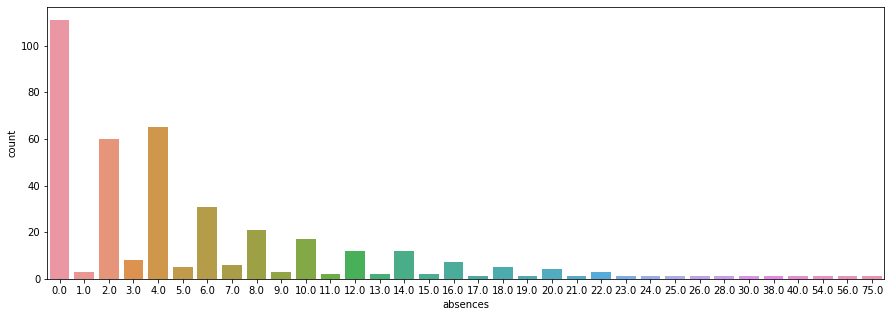

In [206]:
#значения более 100 можно отнести к выбросам, удалим их 
stud = stud.loc[stud.absences <= 100]
display(pd.DataFrame(stud.absences.value_counts()))
display(stud.absences.describe())
plt.figure(figsize=(15,5))
sns.countplot(x='absences', data=stud)
plt.show()

In [208]:
Output_absences = "Распределение имеет длинный хвост справа. Медиана смещена влево, большинство пропусков находятся в пределах от 0 до 6 дней"

In [209]:
#score — баллы по госэкзамену по математике 

<AxesSubplot:>

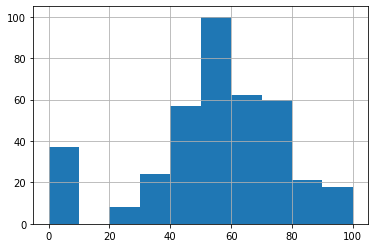

In [210]:
stud.score.hist()

,score
50.0,54
55.0,46
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,26
80.0,16
30.0,15


count    350.000000
mean      57.714286
std       16.167234
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

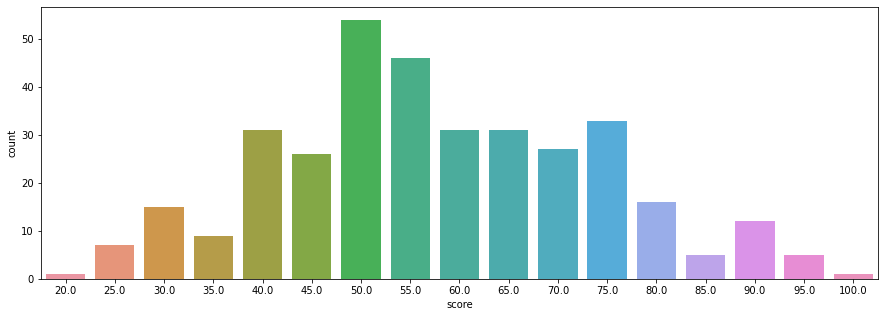

In [211]:
#Удалим строки с незаполненными значениями этой колонки или со значением равным 0. 
stud.score = stud.score.apply(lambda x: 0.0 if math.isnan(x) else x)
stud = stud.loc[stud.score != 0.0]
display(pd.DataFrame(stud.score.value_counts()))
display(stud.score.describe())
plt.figure(figsize=(15,5))
sns.countplot(x='score', data=stud)
plt.show()

In [213]:
Output_score = "score: распределение признака нормальное с достаточно большой дисперсией. Медиана смещена влево"

In [214]:
#Итого в нашем датасете осталось 350 строк, данные в которых подготовлены для дальнейшего анализа.

In [216]:
#Выясним, какие столбцы коррелируют с оценкой score. 
#Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 
stud.corr()

,age,m_edu,m_job,reason,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.119805,0.083059,0.038775,0.100685,-0.011048,0.220280,0.024565,-0.048823,0.113579,-0.052922,0.208898,-0.125073
m_edu,-0.119805,1.000000,-0.307445,-0.032133,-0.168754,0.069860,-0.202744,0.007160,0.002659,0.067300,0.018214,0.074380,0.189611
m_job,0.083059,-0.307445,1.000000,-0.092184,0.083400,0.056638,-0.038184,0.038443,-0.013263,-0.089761,-0.104712,0.055074,-0.196441
reason,0.038775,-0.032133,-0.092184,1.000000,0.061558,-0.083931,0.048000,0.020904,0.123132,0.061219,0.077086,-0.157269,-0.043836
traveltime,0.100685,-0.168754,0.083400,0.061558,1.000000,-0.100566,0.090663,0.018625,-0.011979,0.051686,-0.008215,-0.004653,-0.074284
studytime,-0.011048,0.069860,0.056638,-0.083931,-0.100566,1.000000,-0.148758,0.036770,-0.129208,-0.034565,-0.093911,-0.076900,0.140438
failures,0.220280,-0.202744,-0.038184,0.048000,0.090663,-0.148758,1.000000,-0.009551,0.101170,0.126012,0.043301,0.131315,-0.283415
famrel,0.024565,0.007160,0.038443,0.020904,0.018625,0.036770,-0.009551,1.000000,0.105683,0.017300,-0.047683,-0.089158,0.034830
freetime,-0.048823,0.002659,-0.013263,0.123132,-0.011979,-0.129208,0.101170,0.105683,1.000000,0.297854,0.045163,-0.155753,-0.036852
goout,0.113579,0.067300,-0.089761,0.061219,0.051686,-0.034565,0.126012,0.017300,0.297854,1.000000,-0.004868,0.043311,-0.143220


In [217]:
# как видно из анализа низким коэффициентом корреляции отличеются: reason, traveltime, famrel, freetime, health.
# удалим их из списка 
stud.drop(['reason', 'traveltime', 'famrel', 'freetime', 'health'], inplace = True, axis = 1)

In [218]:
stud.corr()

,age,m_edu,m_job,studytime,failures,goout,absences,score
age,1.000000,-0.119805,0.083059,-0.011048,0.220280,0.113579,0.208898,-0.125073
m_edu,-0.119805,1.000000,-0.307445,0.069860,-0.202744,0.067300,0.074380,0.189611
m_job,0.083059,-0.307445,1.000000,0.056638,-0.038184,-0.089761,0.055074,-0.196441
studytime,-0.011048,0.069860,0.056638,1.000000,-0.148758,-0.034565,-0.076900,0.140438
failures,0.220280,-0.202744,-0.038184,-0.148758,1.000000,0.126012,0.131315,-0.283415
goout,0.113579,0.067300,-0.089761,-0.034565,0.126012,1.000000,0.043311,-0.143220
absences,0.208898,0.074380,0.055074,-0.076900,0.131315,0.043311,1.000000,-0.214358
score,-0.125073,0.189611,-0.196441,0.140438,-0.283415,-0.143220,-0.214358,1.000000


<AxesSubplot:>

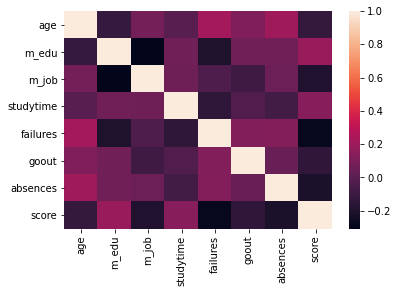

In [219]:
# попробуем визуализировать корреляцию 
stud_corr = stud.corr()
sns.heatmap(stud_corr)

In [220]:
# Интересное наблюдение, наиболее ярко выроженна обратная зависимость, так absences и failures сильно влияют в негативную сторону 
# из положительных факторов влияния можно выделить m_edu и studytime 

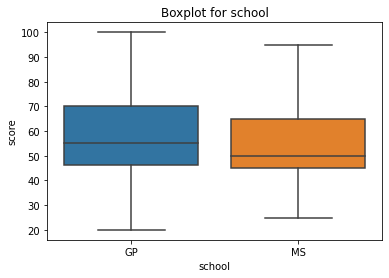

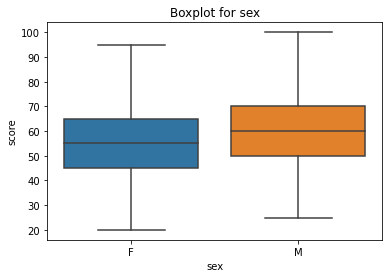

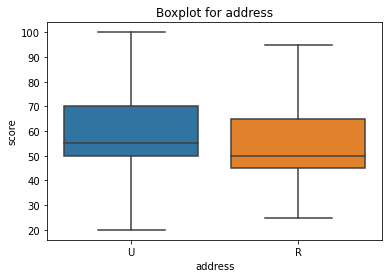

In [221]:
#Для анализа влияния номинативных значений на итоговую оценку используем графики box-plot. 
#Разделим анализ параметров на группы исходя из логического смысла параметра.
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (6, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column])],
               ax=ax)    
    ax.set_title('Boxplot for ' + column)
    plt.show()

for col in ['school','sex','address']:
    get_boxplot(col)

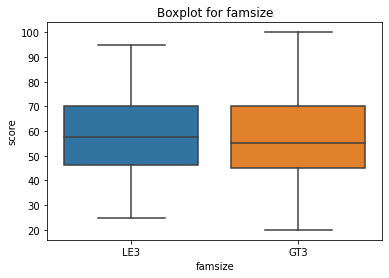

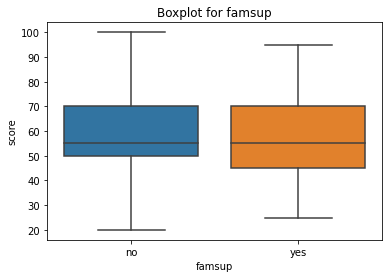

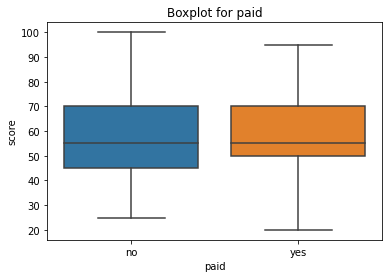

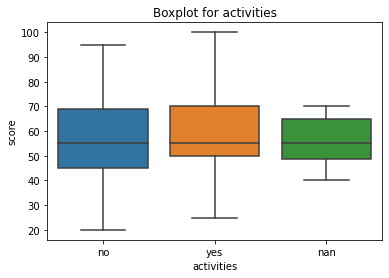

In [222]:
for col in ['famsize', 'famsup', 'paid', 'activities']:
    get_boxplot(col)

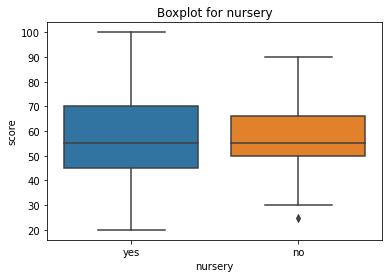

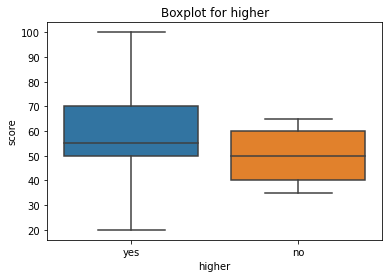

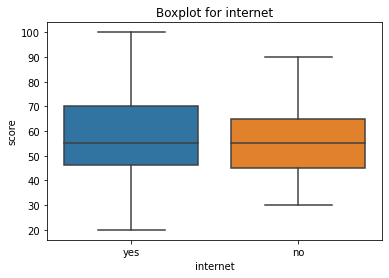

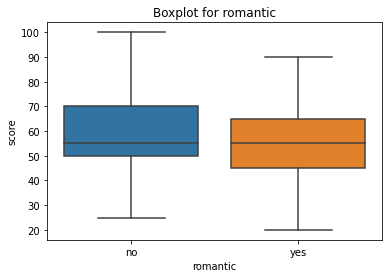

In [223]:
for col in ['nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

проверим есть ли статистическая разница в распределении оценок по номинативным признакам с помощью теста Стьюдента.

In [228]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.1/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [230]:
for col in ['school','sex','address','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','guardian']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher


следовательно для дальнейшего анализа имеет смысл оставить значения: 'sex','address','schoolsup','higher'

Итого для финального dataset мы оставляем 'sex','address','schoolsup','higher', а также age	m_edu	m_job	studytime	failures	goout	absences	score

In [239]:
stud_for_model = stud.loc[:, ['sex','address','schoolsup','higher', "age", "m_edu", "studytime", "failures", "goout", "absences", "score"]]
stud_for_model.head(20)

,sex,address,schoolsup,higher,age,m_edu,studytime,failures,goout,absences,score
0,F,U,yes,yes,18,4.0,2.0,1.0,4.0,6.0,30.0
1,F,U,no,yes,17,1.0,2.0,1.0,3.0,4.0,30.0
2,F,U,yes,yes,15,1.0,2.0,4.0,2.0,10.0,50.0
3,F,U,no,yes,15,4.0,3.0,1.0,2.0,2.0,75.0
4,F,U,no,yes,16,3.0,2.0,1.0,2.0,4.0,50.0
5,M,U,no,yes,16,4.0,2.0,1.0,2.0,10.0,75.0
6,M,U,no,yes,16,2.0,2.0,1.0,4.0,0.0,55.0
7,F,U,yes,yes,17,4.0,2.0,1.0,4.0,6.0,30.0
8,M,U,no,yes,15,3.0,2.0,1.0,2.0,0.0,95.0
9,M,U,no,yes,15,3.0,2.0,1.0,1.0,0.0,75.0



В результате проведенного анализа можно сделать следующие выводы:

- Значения studytime_granular это те же данные, что и studytime только умноженные на 3, в связи с этим studytime_granular исключили из финального dataset
- В данных достаточно много пустых значений.В некоторых процент пропусков доходит до 12% 
- Некоторые значения, найдя зависимость от других показателей удалось заполнить, например, 
    - #13 traveltime — время в пути до школы 17 значений отсутствовало. Предположение, если время в пути более 15 мин (2, 3 и 4 значение), то школьник живет вне города, если значение времени на дорогу не указано, заменяем пустое значение на наиболее распространенное/ мода. Таким образом все значения удалось заполнить
    - такой же принцып применен для Traevel time, family size и т.д. 

- Несколько раз встречались значения, при заполнении которых, скорее всего была допущена ошибка, например - f_edu было значение "40", такого нет в описание. Было принято решение заменить значение "40" на "4"

- Выбросы найдены только в столбцах с пропусками занятий
- Параметры "количество внеучебных неудач" и "количество пропущенных занятий" имеют обратную корреляцию с итоговой оценкой на экзамене/ score

- Самые важные параметры, которые предлагается использовать в дальнейшем dataset:
    - пол учащегосы
    - тип адреса
    - наличие школьной поддрежки
    - желание получить высшее образование
    - возраст учащегося
    - образование матери
    - время на учёбу помимо школы
    - количество внеучебных неудач
    - проведение времени с друзьями
    - количество пропущенных занятий
